# Comparing Bandit Agents

This notebook compares the performance of different bandit agents.

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import os

from bart_playground.bandit.sim_util import (LinearScenario, LinearOffsetScenario, OffsetScenario, FriedmanScenario)
from compare_agents import (
    compare_agents_across_scenarios, print_summary_results, plot_comparison_results
)

In [2]:
# Create test scenarios
np.random.seed(3)
    
scenarios = {
    #"Linear": LinearScenario(P=4, K=3, sigma2=1.0),
    #"LinearOffset": LinearOffsetScenario(P=4, K=3, sigma2=1.0),
    "Offset": OffsetScenario(P=4, K=3, sigma2=1.0),
    # "Offset2": OffsetScenario(P=4, K=3, sigma2=0.1),
    # "Friedman": FriedmanScenario(P=5, K=3, sigma2=1.0, lambda_val=5),
    # "Sparse": FriedmanScenario(P=50, K=3, sigma2=1.0, lambda_val=5)
}

np.random.seed(0)

In [4]:
# Define experiment parameters
from bart_playground.bandit.bcf_agent import BCFAgent, BCFAgentPSOff
from bart_playground.bandit.basic_agents import SillyAgent, LinearTSAgent
from bart_playground.bandit.ensemble_agent import EnsembleAgent
from bart_playground.bandit.me_agents import HierTSAgent, LinearTSAgent2, LinearUCBAgent, METSAgent

import multiprocessing

cores = multiprocessing.cpu_count()

n_simulations = 4  # Number of simulations per scenario
n_draws = 200      # Number of draws per simulation

def call_func():
    return(compare_agents_across_scenarios(
        scenarios=scenarios,
        n_simulations=n_simulations,
        n_draws=n_draws,
        agent_classes=[SillyAgent, LinearTSAgent, BCFAgent], #, EnsembleAgent], #, BCFAgentPSOff], # LinearUCBAgent, METSAgent, HierTSAgent],
        agent_names=["Random", "LinearTS", "MBCF-TS"], #, "MBCF+Linear"] #, "METS", "HierTS"],
        n_jobs=min(n_simulations, cores),  # Use all available cores or the number of simulations, whichever is smaller
    ))
    
# results = call_func()

In [5]:
from bart_playground.samplers import Sampler
from bart_playground.bandit.sim_util import simulate
from bart_playground.bandit.bcf_agent import BCFAgent, BCFAgentPSOff
from bart_playground.bandit.sim_util import Scenario
# %load_ext memory_profiler
# %mprun -f BCFAgent.update_state call_func()

In [6]:
results = call_func()


Evaluating Offset scenario...


Simulating: 100%|██████████| 200/200 [00:18<00:00, 10.78it/s]


## Print Summary Results

Let's print a summary of the results for each scenario.

In [6]:
print_summary_results(results)


=== Offset Scenario ===

Final cumulative regrets (mean ± std):
  Random: 1302.32 (±0.00)
  LinearTS: 379.48 (±0.00)
  MBCF-TS: 125.64 (±0.00)

Average computation times (seconds):
  Random: 0.0030 (±0.0000)
  LinearTS: 0.0625 (±0.0000)
  MBCF-TS: 27.5118 (±0.0000)



## Visualize Results

Finally, let's visualize the cumulative regret for each agent across scenarios.

In [7]:
# Create results directory if it doesn't exist
results_dir = "./results/agent_comparison14_test"
if not os.path.exists(results_dir):
    os.makedirs(results_dir)

import pickle

result_filename = os.path.join(results_dir, f"result.pkl")


In [8]:
with open(result_filename, "wb") as file:
    pickle.dump((results, n_draws), file)


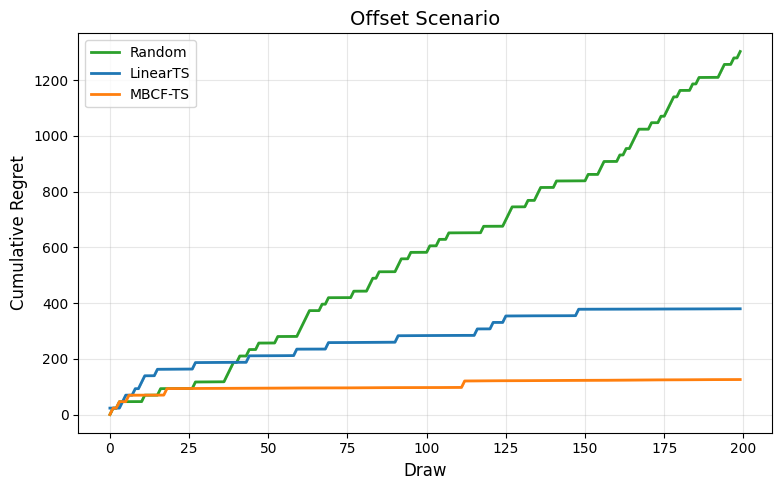

In [9]:
# import pickle
# results_dir = "./results/agent_comparison5"
# result_filename = os.path.join(results_dir, f"result.pkl")
results, n_draws = pickle.load(file=open(result_filename, "rb"))

# Plot results and save to file
plot_comparison_results(
    results=results,
    n_draws=n_draws,
    save_path=f"{results_dir}/agent_comparison_results.png",
    show_time=False
)